In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from scipy.signal import decimate
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import minimize

In [37]:
speeds = pd.read_excel('Raw Data - Measured and Modelled Trunk Acc & Upper Mass Acc & GRF.xlsx', sheet_name='Measured TrunkAcc').iloc[0].values[1:].astype(str)
subjects = list(pd.read_excel('Raw Data - Measured and Modelled Trunk Acc & Upper Mass Acc & GRF.xlsx', sheet_name='Measured TrunkAcc').columns[1:].astype(str).str.split('.'))
subject_index = dict()
trial = 0
last_speed = '-1'
for i in range(len(subjects)):
    if speeds[i] != last_speed:
        trial = 0
    else:
        trial = trial + 1
    last_speed = speeds[i]
    subject_index[subjects[i][0]+','+speeds[i] + ','+ str(trial)] = i + 1

subject_index

{'1,2,0': 1,
 '1,2,1': 2,
 '1,2,2': 3,
 '1,2,3': 4,
 '1,3,0': 5,
 '1,3,1': 6,
 '1,3,2': 7,
 '1,3,3': 8,
 '1,4,0': 9,
 '1,4,1': 10,
 '1,4,2': 11,
 '1,4,3': 12,
 '1,5,0': 13,
 '1,5,1': 14,
 '1,5,2': 15,
 '1,5,3': 16,
 '2,2,0': 17,
 '2,2,1': 18,
 '2,2,2': 19,
 '2,2,3': 20,
 '2,3,0': 21,
 '2,3,1': 22,
 '2,3,2': 23,
 '2,3,3': 24,
 '2,4,0': 25,
 '2,4,1': 26,
 '2,4,2': 27,
 '2,4,3': 28,
 '2,5,0': 29,
 '2,5,1': 30,
 '2,5,2': 31,
 '2,5,3': 32,
 '3,2,0': 33,
 '3,2,1': 34,
 '3,2,2': 35,
 '3,2,3': 36,
 '3,3,0': 37,
 '3,3,1': 38,
 '3,3,2': 39,
 '3,3,3': 40,
 '3,4,0': 41,
 '3,4,1': 42,
 '3,4,2': 43,
 '3,4,3': 44,
 '3,5,0': 45,
 '3,5,1': 46,
 '3,5,2': 47,
 '3,5,3': 48,
 '4,2,0': 49,
 '4,2,1': 50,
 '4,2,2': 51,
 '4,2,3': 52,
 '4,3,0': 53,
 '4,3,1': 54,
 '4,3,2': 55,
 '4,3,3': 56,
 '4,4,0': 57,
 '4,4,1': 58,
 '4,4,2': 59,
 '4,4,3': 60,
 '4,5,0': 61,
 '4,5,1': 62,
 '4,5,2': 63,
 '4,5,3': 64,
 '5,2,0': 65,
 '5,2,1': 66,
 '5,2,2': 67,
 '5,2,3': 68,
 '5,3,0': 69,
 '5,3,1': 70,
 '5,3,2': 71,
 '5,3,3': 72,
 

In [8]:
data_acc = pd.read_excel('Raw Data - Measured and Modelled Trunk Acc & Upper Mass Acc & GRF.xlsx', sheet_name='Measured TrunkAcc', skiprows=2)
data_acc

,Time (ms),TrunkAcc (g),TrunkAcc (g).1,TrunkAcc (g).2,TrunkAcc (g).3,TrunkAcc (g).4,TrunkAcc (g).5,TrunkAcc (g).6,TrunkAcc (g).7,TrunkAcc (g).8,...,TrunkAcc (g).310,TrunkAcc (g).311,TrunkAcc (g).312,TrunkAcc (g).313,TrunkAcc (g).314,TrunkAcc (g).315,TrunkAcc (g).316,TrunkAcc (g).317,TrunkAcc (g).318,TrunkAcc (g).319
0,0,-0.635786,-0.819895,-0.658442,-0.751802,-0.820120,-0.657024,-0.744360,-0.755735,-0.460263,...,-0.711069,-0.720159,-0.531801,-0.180798,-0.697412,-0.540818,-0.073628,-0.782757,-0.556920,-0.725379
1,10,-0.702232,-0.828149,-0.682308,-0.867386,-0.779688,-0.558552,-0.679500,-0.643863,-0.435184,...,-0.739093,-0.595552,-0.765189,-0.409132,-0.672061,-0.536367,-0.157160,-0.788167,-0.581801,-0.299441
2,20,-0.765906,-0.846839,-0.723618,-0.720517,-0.826745,-0.622712,-0.726913,-0.189881,-0.456577,...,-0.628212,-0.566846,-0.819075,-0.502382,-0.590824,-0.338440,-0.331576,-0.685766,-0.248418,0.155255
3,30,-0.618093,-0.780845,-0.632453,-0.477881,-0.828750,-0.531376,-0.866007,0.639201,-0.184079,...,-0.349155,0.312386,-0.784692,-0.500146,-0.044582,-0.052073,-0.487534,-0.401190,0.044003,0.927072
4,40,-0.278681,-0.519273,-0.434882,0.029696,-0.616554,-0.235664,-0.652263,1.518867,0.476515,...,0.521738,1.346733,-0.547571,-0.365657,0.846885,0.504205,-0.691256,-0.094315,0.071884,1.855744
5,50,0.394947,0.073523,0.120953,0.803698,-0.132898,0.191260,-0.156908,1.891850,1.339448,...,1.653741,1.729903,0.171458,0.054952,1.518685,1.206173,-0.152124,0.516433,0.819103,2.284476
6,60,1.126337,0.814159,0.870143,1.391486,0.643525,1.051061,0.651374,1.584475,1.893199,...,2.208423,1.322091,1.120423,0.626247,1.596642,1.635482,1.277679,1.319494,2.163309,2.006469
7,70,1.471519,1.322447,1.356937,1.471119,1.345153,1.967157,1.489062,1.027880,1.779074,...,1.826075,0.731685,1.746807,1.070658,1.235870,1.624805,2.674455,1.701626,2.823791,1.477494
8,80,1.299072,1.340371,1.357539,1.137796,1.594487,2.306619,1.879084,0.765833,1.236798,...,1.033166,0.572252,1.719239,1.225546,0.926214,1.388122,3.077832,1.444494,2.381506,1.096066
9,90,0.898202,0.982665,1.048299,0.777396,1.380489,1.901224,1.679519,0.946349,0.848233,...,0.619665,0.831395,1.278944,1.173312,0.931551,1.222335,2.200818,0.950566,1.377539,0.885466


In [35]:
data_grf = pd.read_excel('Raw Data - Measured and Modelled Trunk Acc & Upper Mass Acc & GRF.xlsx', sheet_name='Measured GRF', skiprows=2)
data_grf

,Time (ms),GRF (N·kg-1),GRF (N·kg-1).1,GRF (N·kg-1).2,GRF (N·kg-1).3,GRF (N·kg-1).4,GRF (N·kg-1).5,GRF (N·kg-1).6,GRF (N·kg-1).7,GRF (N·kg-1).8,...,GRF (N·kg-1).310,GRF (N·kg-1).311,GRF (N·kg-1).312,GRF (N·kg-1).313,GRF (N·kg-1).314,GRF (N·kg-1).315,GRF (N·kg-1).316,GRF (N·kg-1).317,GRF (N·kg-1).318,GRF (N·kg-1).319
0,0.000000,0.192534,0.218370,0.129408,0.193477,0.221718,0.277053,0.292075,0.198636,0.133711,...,0.068999,0.350452,0.154318,0.307823,0.160720,0.178017,0.342421,0.305457,0.232157,0.244404
1,0.333333,0.210475,0.229387,0.153212,0.216528,0.235620,0.339049,0.309427,0.210318,0.168741,...,0.112866,0.384264,0.181441,0.323427,0.203753,0.215387,0.410396,0.355430,0.297478,0.325301
2,0.666667,0.242192,0.249673,0.190930,0.257160,0.262659,0.424574,0.338527,0.241349,0.240041,...,0.183110,0.433460,0.239469,0.350054,0.267975,0.270889,0.512244,0.429187,0.405081,0.445462
3,1.000000,0.284590,0.278241,0.237549,0.310390,0.300710,0.525084,0.377993,0.287477,0.327891,...,0.262168,0.495255,0.314754,0.386756,0.344275,0.337936,0.635843,0.519497,0.534661,0.586033
4,1.333333,0.334956,0.313797,0.290134,0.372478,0.347443,0.635967,0.426183,0.344397,0.424779,...,0.346446,0.567169,0.400222,0.432219,0.428437,0.412889,0.774271,0.621653,0.677670,0.739566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,433.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1302,434.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1303,434.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1304,434.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
index = '1,2,0'
a1 = data_acc.iloc[:,subject_index[index]].values
time = data_acc.iloc[:,0].values[~np.isnan(a1)]
a1 = a1[~np.isnan(a1)]
grf = data_grf.iloc[:,subject_index[index]].values
grf = grf[~np.isnan(grf)]
grf = decimate(grf, 30)



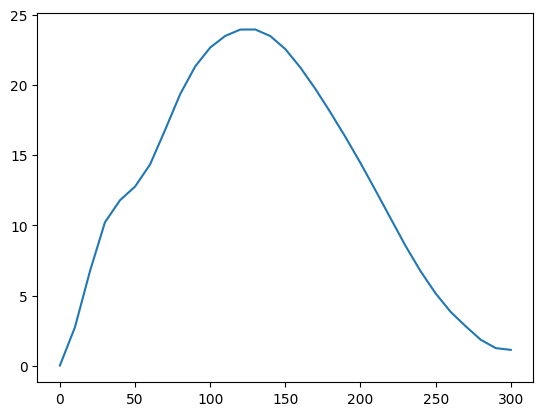

In [59]:
plt.plot(time, grf)

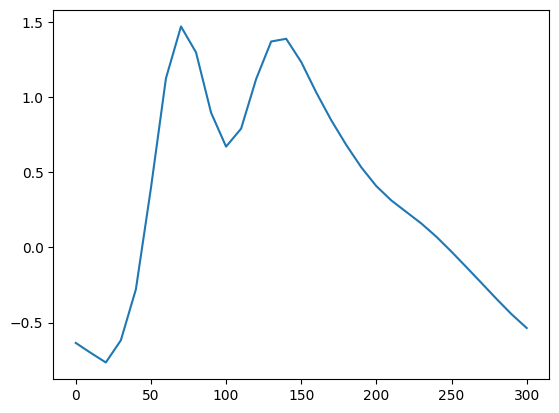

In [60]:
plt.plot(time, a1)

In [62]:
v1 = cumulative_trapezoid(a1, dx=0.1, initial=0)
p1 = cumulative_trapezoid(v1, dx=0.1, initial=0)

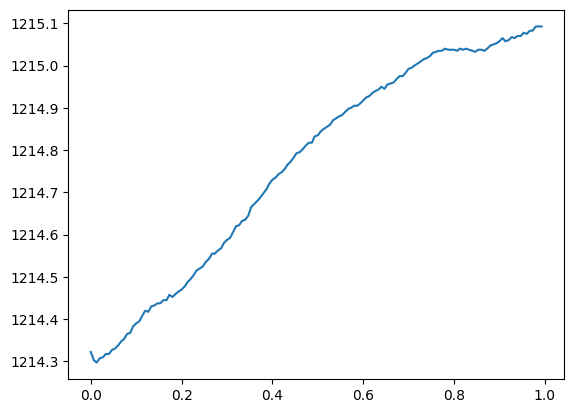

In [79]:
data_static = pd.read_csv('/media/rnwatanabe/Data/Renato/tiagoMestrado/RBDS002static.txt', sep='\t')
dt = data_static['Time'].values[1]
trunk_cm = (data_static[['R.ASISX', 'R.ASISY', 'R.ASISZ']].values + data_static[['L.ASISX', 'L.ASISY', 'L.ASISZ']].values + 
            data_static[['R.PSISX', 'R.PSISY', 'R.PSISZ']].values + data_static[['L.PSISX', 'L.PSISY', 'L.PSISZ']].values)/4
time = data_static['Time'].values
plt.plot(data_static['Time'], trunk_cm[:,2])

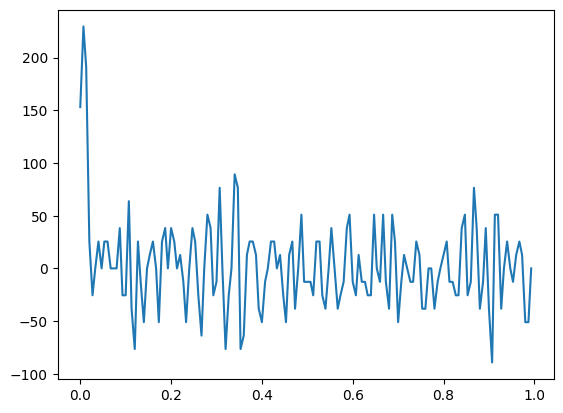

In [80]:
p1 = trunk_cm[:,2]
v1 = np.gradient(p1, dt)
a1 = np.gradient(v1, dt)
plt.plot(time, a1)

In [90]:
p1_medio = p1.mean()/1000
a1_medio = a1.mean()/1000
def erro(theta, a1, p1): 
    g = -9.81
    return np.sum((a1-(theta[0]**2*(p1-theta[1])+g))**2)
theta = minimize(erro, [1, 1], (a1_medio, p1_medio)).x
theta

array([ 1.87744535, -1.56928407])